---
title: "Applying logistic regression and SVM"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-18"
categories: [python, datacamp, logistic regression, linear classifier, machine learning, SVM ]
image: "applyingLogisiticRegression.jpg"

---

# Applying logistic regression and SVM

We will learn the basics of applying logistic regression and support vector machines (SVMs) to classification problems. You'll use the scikit-learn library to fit classification models to real data.

This **Applying logistic regression and SVM** is part of [Datacamp course: Linear Classifiers in Python](https://app.datacamp.com/learn/courses/linear-classifiers-in-python)

This is my learning experience of data science through DataCamp

In [25]:
import numpy as np
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt

We will explore subset of [Large movie review dataset](https://ai.stanford.edu/~amaas/data/sentiment/)
The X variables contain features based on the words in the movie reviews, and the y variables contain labels for whether the review sentiment is positive (+1) or negative (-1).

In [26]:
X_train, y_train = load_svmlight_file('dataset/aclImdb_v1/aclImdb/train/labeledBow.feat')
X_test, y_test = load_svmlight_file('dataset/aclImdb_v1/aclImdb/test/labeledBow.feat')

In [27]:
X_train.shape

(25000, 89527)

In [28]:
X_test.shape

(25000, 89523)

In [29]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [30]:
X_train[0]

<1x89527 sparse matrix of type '<class 'numpy.float64'>'
	with 90 stored elements in Compressed Sparse Row format>

In [31]:
y_train[y_train < 5] = -1.0
y_train[y_train >=5] = 1.0

y_test[y_test < 5] = -1.0
y_test[y_test >= 5] = 1.0

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train[:, :89523], y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

Prediction for test example 0: -1.0


### Running LogisticRegression and SVC
In this exercise, you'll apply logistic regression and a support vector machine to classify images of handwritten digits.

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

1.0
0.9666666666666667


C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9977728285077951
0.9844444444444445


### Sentiment analysis for movie reviews

In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the Large Movie Review Dataset.

The variables X and y are already loaded into the environment. X contains features based on the number of times words appear in the movie reviews, and y contains labels for whether the review sentiment is positive (+1) or negative (-1).


In [35]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])
# Review: LOVED IT! This movie was amazing. Top 10 this year.
# Probability of positive review: 0.8079007873616059


# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

# Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
# Probability of positive review: 0.5855117402793947

NameError: name 'get_features' is not defined

### Linear classifiers

* Classification: learning to predict categories
* decision boundary: the surface separating different predicted classes
* linear classifier: a classifier that learn linear decision boundaries
        e.g. logistic regression, linear SVM
* linearly separable: a dataset can be perfectly explained by a linear classifier

### Visualizing decision boundaries

In [36]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

    Returns
    -------
        xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [37]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)),
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [38]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None):
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [39]:
def plot_4_classifiers(X, y, clfs):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)

In [40]:
#hide
X = np.array([[11.45,  2.4 ],
       [13.62,  4.95],
       [13.88,  1.89],
       [12.42,  2.55],
       [12.81,  2.31],
       [12.58,  1.29],
       [13.83,  1.57],
       [13.07,  1.5 ],
       [12.7 ,  3.55],
       [13.77,  1.9 ],
       [12.84,  2.96],
       [12.37,  1.63],
       [13.51,  1.8 ],
       [13.87,  1.9 ],
       [12.08,  1.39],
       [13.58,  1.66],
       [13.08,  3.9 ],
       [11.79,  2.13],
       [12.45,  3.03],
       [13.68,  1.83],
       [13.52,  3.17],
       [13.5 ,  3.12],
       [12.87,  4.61],
       [14.02,  1.68],
       [12.29,  3.17],
       [12.08,  1.13],
       [12.7 ,  3.87],
       [11.03,  1.51],
       [13.32,  3.24],
       [14.13,  4.1 ],
       [13.49,  1.66],
       [11.84,  2.89],
       [13.05,  2.05],
       [12.72,  1.81],
       [12.82,  3.37],
       [13.4 ,  4.6 ],
       [14.22,  3.99],
       [13.72,  1.43],
       [12.93,  2.81],
       [11.64,  2.06],
       [12.29,  1.61],
       [11.65,  1.67],
       [13.28,  1.64],
       [12.93,  3.8 ],
       [13.86,  1.35],
       [11.82,  1.72],
       [12.37,  1.17],
       [12.42,  1.61],
       [13.9 ,  1.68],
       [14.16,  2.51]])

y = np.array([ True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True])

C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


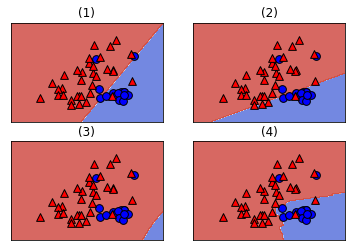

In [41]:
from sklearn.svm import LinearSVC

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)